# コードについて

道路幅方向のポテンシャル関数(Flockingの車線保持ルール)について図示

In [21]:
import numpy as np
import matplotlib.pyplot as plt

w_lane = 3 # lane width
n_lane = 3 # lane number
width = n_lane*w_lane # road width
h = 1 # local maximum value
p_road = 1.0
p_edge = 2.0
plt.rcParams['font.family'] = 'Arial'
plt.rcParams["font.size"] = 16


# Show

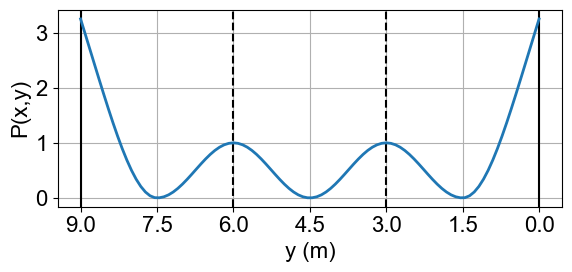

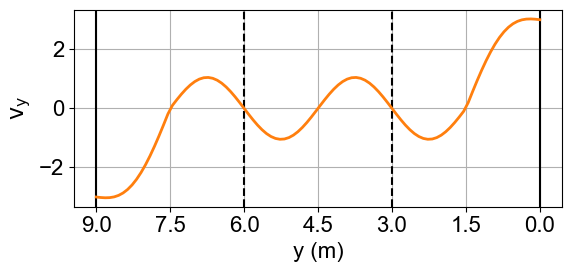

In [37]:
def road_edge_func(_x):
    road_width = w_lane*n_lane
    if _x <= w_lane/2:
        _y = p_edge/2 * (_x - w_lane/2)**2
    elif _x >= road_width - w_lane/2:
        _y = p_edge/2 * (_x - (road_width - w_lane/2))**2
    else:
        _y = 0
    # _y = p_edge*(np.exp(_x-(2*n_lane-1)/2*w_lane) + np.exp(-_x+w_lane/2))
    # _y = (np.exp(p_edge*(_x-(2*n_lane-1)/2*w_lane)) - np.exp(p_edge*(-_x+w_lane/2)))
    return _y

def road_edge_force(_x):
    road_width = w_lane*n_lane
    if _x <= w_lane/2:
        _y = p_edge*(w_lane/2 - _x)
    elif _x >= road_width - w_lane/2:
        _y = -p_edge*(_x - (road_width - w_lane/2))
    else:
        _y = 0
    # _y = -p_edge*(np.exp(_x-(2*n_lane-1)/2*w_lane) - np.exp(-_x+w_lane/2))
    # _y = (np.exp(p_edge*(_x-(2*n_lane-1)/2*w_lane)) + np.exp(p_edge*(-_x+w_lane/2)))
    return _y

def potential_func(x_list):
    y_list = []
    for i in range(len(x_list)):
        _x = x_list[i]
        y = p_road/2*np.cos(2*_x/w_lane*np.pi) + p_road/2
        # y = 0
        road_y = road_edge_func(_x)
        y += road_y
        y_list.append(y)
    return y_list

def potential_force(x_list):
    y_list= []
    for i in range(len(x_list)):
        x = x_list[i]
        y = p_road*np.pi/w_lane*(np.sin(2*np.pi*x/w_lane))
        # y = 0
        # line_dis = x % w_lane # 車線からの距離
        road_y = road_edge_force(x)
        y += road_y 
        # y = -(2*h/w_lane)*line_dis + h
        y_list.append(y)
    return y_list

_x = np.linspace(0,width,100)
_y = potential_func(_x)
fig, ax = plt.subplots(figsize=(6,3))
ax.axvline(x=3,color='k',linestyle='--')
ax.axvline(x=6,color='k',linestyle='--')
ax.axvline(x=0,color='k',linestyle='-')
ax.axvline(x=9,color='k',linestyle='-')
plt.plot(_x, _y, linewidth=2.0)
ax.invert_xaxis()
plt.xticks([0,1.5, 3, 4.5, 6, 7.5, 9])
plt.xlabel('y (m)')
plt.ylabel('P(x,y)')
plt.grid()
plt.tight_layout()
# plt.savefig('potential_function.png', dpi=150)
plt.show()

_x = np.linspace(0,width,100)
_y = potential_force(_x)
fig, ax = plt.subplots(figsize=(6,3))
ax.axvline(x=3,color='k',linestyle='--')
ax.axvline(x=6,color='k',linestyle='--')
ax.axvline(x=0,color='k',linestyle='-')
ax.axvline(x=9,color='k',linestyle='-')
plt.plot(_x, _y, linewidth=2.0, color="tab:orange")
ax.invert_xaxis()
plt.xticks([0,1.5, 3, 4.5, 6, 7.5, 9])
plt.xlabel('y')
plt.xlabel('y (m)')
plt.ylabel(r'$\mathrm{v_y}$')
plt.grid()
plt.tight_layout()
# plt.savefig('potential_force.png', dpi=150)
plt.show()